E-Commerce Company - Fraud Analysis: Descriptive Analysis

Outline : 
1. Business Understanding
2. Importing Data
3. Splitting Data
4. Exploratory Data Analysis
5. Pre-Processing


1. BUSINESS UNDERSTANDING

An e-commerce company might encounter fraudulent transactions. These can arise from various sources such as : 
- payment fraud
- account takeover
- identity theft
- etc 

However, this new e-commerce company lacks historical data on fraudulent activities, making it uncertain how to detect such behavior. To address this challenge, they need to implement descriptive analytics to flag suspicious transactions. These flagged transactions should then undergo manual investigation by a dedicated team to validate their authenticity.

In [296]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1.1 Data Description
Data from Fraudulent E-Commerce Transactions. Variable used : 
- Transaction Amount (numeric) : The total amount of money exchanged in the transaction 
- Quantity (numeric): The number of products involved in the transaction
- Customer Age (numberic): The age of the customer making the transaction
- Account Age Days (numeric): The age of the customer's account in days at the time of the transaction
- Transaction Hour (numeric): The hour of the day when the transaction occurred

1.2 Define the problem
- Data input : E-Commerce transaction data
- Output : anomaly detection (value 1 for anomaly predicted transaction, and value 0 for otherwise)
- If the transaction flagged as anomaly, the decision maker will label the transaction as suspicious and alert the fraud investigation team

1.3 Task
- Task : Anomaly detection
- Technique : K-Means

2. IMPORTING DATA

In [297]:
# read dataset function
def read_data(path):
    """
    Reads a CSV file at the given path, removes any duplicate rows,
    and returns its contents as a pandas DataFrame.

    Parameters
    ----------
    path : str
        The sample data input path (csv format)

    Return
    ------
    df : pd.DataFrame
        The sample data input
    """
    # Read data
    df = pd.read_csv(path)

    # Validate
    print('Data shape:', df.shape)

    return df

In [298]:
# Dataset name / Path
path = 'fraud_data.csv'

# Read the data
df_raw = read_data(path = path)
df_raw.head()

Data shape: (23634, 16)


,Transaction ID,Customer ID,Transaction Date,Payment Method,Product Category,Quantity,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Transaction Amount,Customer Age,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,2024-03-24 23:42:43,PayPal,electronics,1,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,< 100,40 - 49,180 - 359,< 24
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,2024-01-22 00:53:31,credit card,electronics,3,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,100 - 499,30 - 39,180 - 359,< 6
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,2024-01-22 08:06:03,debit card,toys & games,5,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,100 - 499,20 - 29,> 360,6 - 11
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,2024-01-16 20:34:53,credit card,electronics,5,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,< 100,40 - 49,180 - 359,< 24
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,2024-01-16 15:47:23,credit card,clothing,5,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,< 100,40 - 49,30 - 179,12 - 18


In [299]:
# Define the selected variables
col = ["Transaction Amount", "Transaction Hour",
      "Account Age Days", "Quantity",
       "Customer Age" ]

In [300]:
# Get only relevant columns we choose
df = df_raw[col].copy()

# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Transaction Amount  23634 non-null  object
 1   Transaction Hour    23634 non-null  object
 2   Account Age Days    23634 non-null  object
 3   Quantity            23634 non-null  int64 
 4   Customer Age        23634 non-null  object
dtypes: int64(1), object(4)
memory usage: 923.3+ KB


3. SPLITTING DATA
Split into train (60% data) and test (40% data)
- train data: will be used to build the technique
- test data: will be used for final evaluation

In [301]:
# Create a function to split train-test

from sklearn.model_selection import train_test_split

def split_train_test(X, test_size, random_state=42):
    """
    Split data into train & test

    Parameters
    ----------
    X : pd.DataFrame
        The input data
    test_size : float
        The proportion of number of test data to total data

    stratify : pd.Series
        Reference to stratify the splitting

    random_state : int, default=42
        The random seed, for reproducibility

    Returns
    -------
    X_train : pd.DataFrame
        The input train data

    X_test : pd.DataFrame
        The input test data
    """

    # Then, split train and test
    X_train, X_test = train_test_split(
        X,
        test_size = test_size,
        random_state = random_state
    )

    # Validate
    print('X train shape:', X_train.shape)
    print('X test shape :', X_test.shape)

    return X_train, X_test

In [302]:
# Run the code
splitted_data = split_train_test(
    X = df,
    test_size = 0.4,
    random_state = 42
)

X_train, X_test = splitted_data

X train shape: (14180, 5)
X test shape : (9454, 5)


4. EXPLORATORY DATA ANALYSIS 
- Check for statistics decriptives
- Check for missing values
- Check for data distribution & correlation

In [303]:
# Print train set shape
print('X train shape:', X_train.shape)

X train shape: (14180, 5)


In [304]:
# create EDA dataset
eda_df = X_train.copy()

In [305]:
# Print train set shape after concat
print('eda_df shape:', eda_df.shape)

eda_df shape: (14180, 5)


4.1 Check for statistics description

In [306]:
# statistic descriptive for categorical variables
eda_df.describe(include='object').T

,count,unique,top,freq
Transaction Amount,14180,6,100 - 499,7714
Transaction Hour,14180,4,< 6,3843
Account Age Days,14180,4,180 - 359,6839
Customer Age,14180,6,30 - 39,5404


In [307]:
# statistic descriptive for numerical variables
eda_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,14180.0,3.005783,1.420273,1.0,2.0,3.0,4.0,5.0


4.2 Check for missing values

In [308]:
eda_df.isna().sum()

Transaction Amount    0
Transaction Hour      0
Account Age Days      0
Quantity              0
Customer Age          0
dtype: int64

4.3 Check for Data Distribution

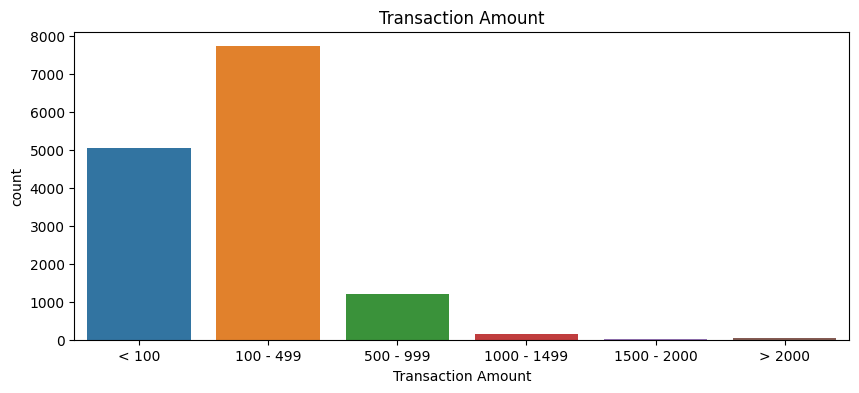

In [309]:
# Transaction Amount
plt.figure(figsize = (10,4))
sns.countplot(data = eda_df,
            x = "Transaction Amount")

plt.title("Transaction Amount")
plt.show()

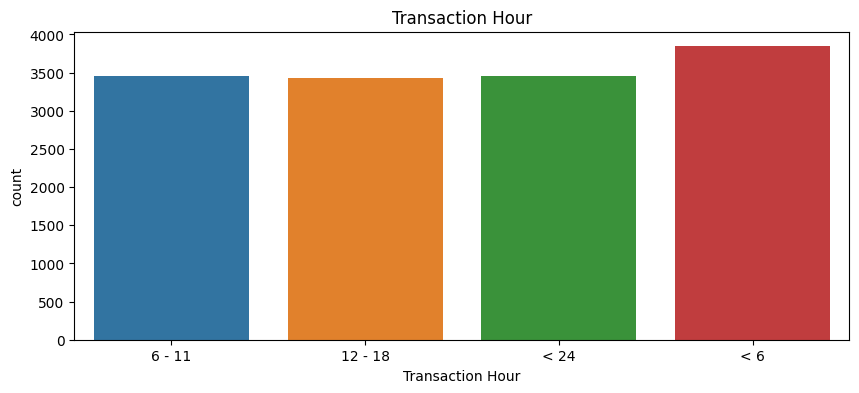

In [310]:
# Transaction Hour
plt.figure(figsize = (10,4))
sns.countplot(data = eda_df,
            x = "Transaction Hour")

plt.title("Transaction Hour")
plt.show()

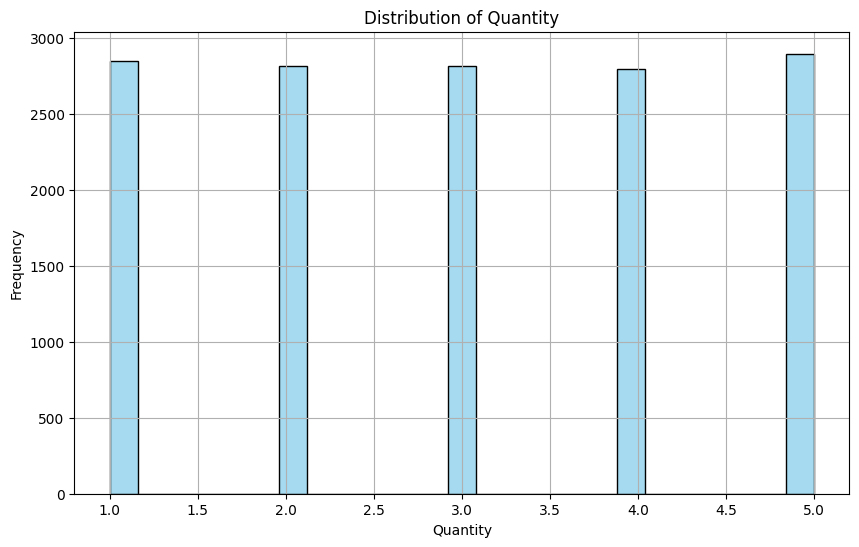

In [311]:
# Quantity 

plt.figure(figsize=(10, 6))
sns.histplot(data=eda_df, x="Quantity", kde=False, color='skyblue', edgecolor='black')
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

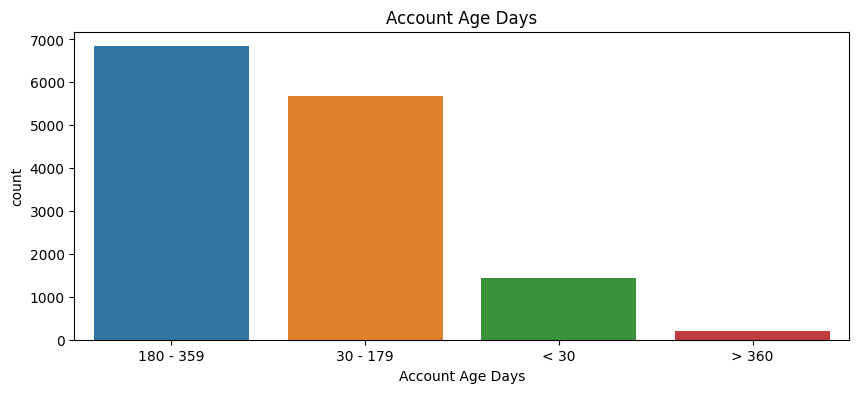

In [312]:
# Account Age Days
plt.figure(figsize = (10,4))
sns.countplot(data = eda_df,
            x = "Account Age Days")

plt.title("Account Age Days")
plt.show()

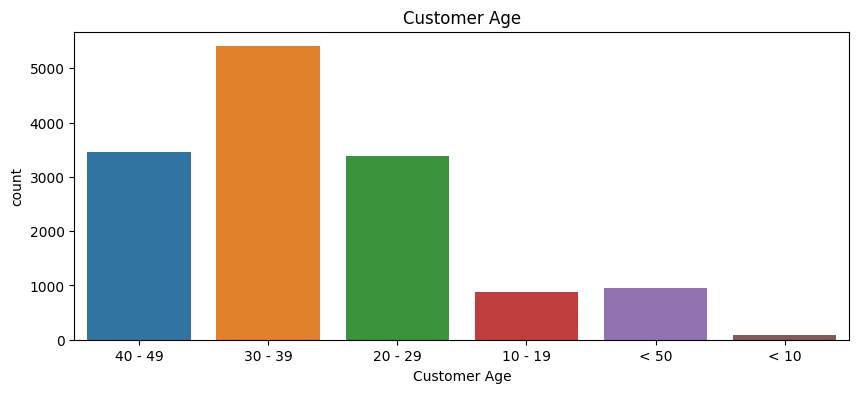

In [313]:
# Customer Age
plt.figure(figsize = (10,4))
sns.countplot(data = eda_df,
            x = "Customer Age")

plt.title("Customer Age")
plt.show()

4.4 Feature Engineering 
- convert all category into numerical


In [314]:
def transformTransactionAmount(data):
    month_list = ["< 100", "100 - 499", "500 - 999", 
                "1000 - 1499", "1500 - 2000", "> 2000"]
    
    number_list = [i+1 for i in range(len(month_list))]


    data["Transaction Amount"] = data["Transaction Amount"].replace(month_list, number_list)

    return data


In [315]:
def transformTransactionHour(data):
    month_list = ["< 6", "6 - 11", "12 - 18", "< 24"]

    number_list = [i for i in range(len(month_list))]

    data["Transaction Hour"] = data["Transaction Hour"].replace(month_list, number_list)

    return data

In [316]:
def transformAccountAgeDays(data):
    month_list = ["< 30", "30 - 179", "180 - 359","> 360"]

    number_list = [i for i in range(len(month_list))]

    data["Account Age Days"] = data["Account Age Days"].replace(month_list, number_list)

    return data

In [317]:
def transformCustomerAge(data):
    month_list = ["< 10", "10 - 19", "20 - 29", "30 - 39","40 - 49", "< 50", ]

    number_list = [i for i in range(len(month_list))]


    data["Customer Age"] = data["Customer Age"].replace(month_list, number_list)

    return data


In [318]:
X_train = transformTransactionAmount(data = X_train)
X_train = transformTransactionHour(data = X_train)
X_train = transformAccountAgeDays(data = X_train)
X_train = transformCustomerAge(data = X_train)


In [319]:
X_train.head()

,Transaction Amount,Transaction Hour,Account Age Days,Quantity,Customer Age
23215,1,1,2,5,4
9326,2,2,1,4,3
18527,2,1,1,1,3
5378,2,1,1,1,4
17975,2,2,2,2,4


In [320]:
# Check missing value
X_train.isna().any()

Transaction Amount    False
Transaction Hour      False
Account Age Days      False
Quantity              False
Customer Age          False
dtype: bool

5. K_MEANS

In [321]:
from sklearn.cluster import KMeans

In [322]:
# Create k-means object
kmeans_obj = KMeans(n_clusters = 3,
                    random_state = 123)

In [323]:
# Fit k-means
kmeans_obj.fit(X_train)

KMeans(n_clusters=3, random_state=123)

In [324]:
# Predict Cluster
cluster_result = kmeans_obj.predict(X_train)

In [325]:
# Reshape predicted cluster to dataframe
cluster_result_train = kmeans_obj.predict(X_train)
cluster_result_train = pd.DataFrame(data = cluster_result,
                              columns = ["cluster"],
                              index = X_train.index)

cluster_result_train.head()

,cluster
23215,2
9326,0
18527,1
5378,1
17975,1


In [326]:
# check cluster proportion
cluster_result_train["cluster"].value_counts(normalize = True)

cluster
1    0.399436
2    0.306700
0    0.293865
Name: proportion, dtype: float64

the proportion is balanced - can't detect anomaly

In [327]:
# check centroid 

kmeans_obj.cluster_centers_

array([[1.75641949, 2.50275978, 1.42908567, 3.99928006, 2.97816175],
       [1.76094633, 1.44420904, 1.40377825, 1.49699859, 3.00406073],
       [1.80041389, 0.47551161, 1.4014716 , 4.01885491, 2.99655093]])

In [328]:
# Create dataframe
centroids = kmeans_obj.cluster_centers_
centroids = pd.DataFrame(data = centroids,
                         columns = X_train.columns)

centroids

,Transaction Amount,Transaction Hour,Account Age Days,Quantity,Customer Age
0,1.756419,2.502760,1.429086,3.999280,2.978162
1,1.760946,1.444209,1.403778,1.496999,3.004061
2,1.800414,0.475512,1.401472,4.018855,2.996551


In [329]:
# show score
- kmeans_obj.score(X_train)

45451.22951042771

Try other K values

In [330]:
score_list = []
k_list = np.arange(2, 11, 1)

for k in k_list:
    # Buat object
    kmeans_obj_k = KMeans(n_clusters = k,
                          max_iter = 50,
                          random_state = 123)

    # Fit data
    kmeans_obj_k.fit(X_train)

    # update score
    score_k = -kmeans_obj_k.score(X_train)
    score_list.append(score_k)

In [331]:
score_list

[54434.87944525418,
 45451.22951042771,
 39856.288836510095,
 35982.7886444259,
 33792.355212992945,
 31689.451487302904,
 30266.721450668454,
 28604.526073015833,
 27773.477380089986]

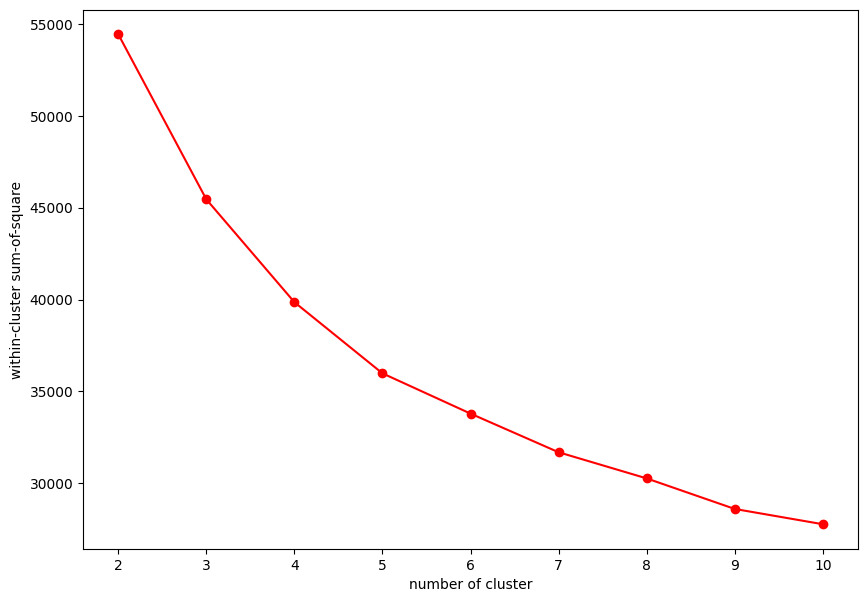

In [332]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

ax.plot(k_list, score_list, "r", marker="o")

ax.set_xlabel("number of cluster")
ax.set_ylabel("within-cluster sum-of-square")
plt.show()

The more clusters, the lower the score.
But, the more clusters, the more complex it is to interpret.
We try to take the best cluster at 5, because the error change in cluster 6 is smaller

5.1. Clustering training data

In [333]:
# Create object
kmeans_obj_best = KMeans(n_clusters = 5,
                         random_state = 123)

# Fit object
kmeans_obj_best.fit(X_train)

KMeans(n_clusters=5, random_state=123)

In [334]:
# Show centroid
# Create dataframe
centroids_best = kmeans_obj_best.cluster_centers_
centroids_best = pd.DataFrame(data = centroids_best,
                              columns = X_train.columns)


centroids_best

,Transaction Amount,Transaction Hour,Account Age Days,Quantity,Customer Age
0,1.761256,2.583531,1.434538,4.017773,3.290581
1,1.762414,0.462414,1.382759,1.489655,3.024483
2,1.809540,0.481654,1.392929,4.028686,3.569380
3,1.759779,2.501845,1.426568,1.494834,3.028044
4,1.763206,1.088342,1.414390,3.920310,1.671220


In [335]:
# predict cluster
cluster_best_train = kmeans_obj_best.predict(X_train)

cluster_best_train = pd.DataFrame(data = cluster_best_train,
                            columns = ["cluster"],
                            index= X_train.index)
cluster_best_train.head()

,cluster
23215,2
9326,0
18527,1
5378,1
17975,3


In [336]:
# check cluster proportion
cluster_best_train["cluster"].value_counts(normalize = True)

cluster
0    0.238082
2    0.211425
1    0.204513
3    0.191114
4    0.154866
Name: proportion, dtype: float64

Get distance point to closest centroid

In [337]:
# return Series of distance between each point and its distance with the closest centroid
def getDistanceByPoint(data, model):

    distance = pd.Series()
    data = data.reset_index(drop = True)

    # iterate over each data
    for i in range(0, len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]

        # Calculate distance between data and the centroid
        distance.at[i] = np.linalg.norm(Xa-Xb)

    return distance

In [338]:
# Assume a values as an outlier / anomaly fraction from all data
outliers_fraction = 0.01

# Get the distance between each point and its nearest centroid.
# The biggest distances are considered as anomaly
distance = getDistanceByPoint(X_train,
                              kmeans_obj)
distance

0        3.794042
1        1.589165
2        3.390854
3        3.541408
4        2.383132
           ...   
14175    2.894686
14176    2.269026
14177    2.746454
14178    2.237554
14179    2.549378
Length: 14180, dtype: float64

In [339]:
# Get the number of outliers based on the fraction we assume
number_of_outliers = int(outliers_fraction * len(distance))

In [340]:
# Get the threshold based on the number of outlier
threshold = distance.nlargest(number_of_outliers).min()
threshold

4.516719838806427

In [341]:
#`anomaly` contain the anomaly result of the above method Cluster (0 : normal, 1 : anomaly)
anomaly = np.array((distance >= threshold).astype(int))
anomaly

array([0, 0, 0, ..., 0, 0, 0])

Get anomaly data statistics description

In [342]:
# Get anomaly data statistics description
X_train.iloc[np.where(anomaly == 1)].describe()

,Transaction Amount,Transaction Hour,Account Age Days,Quantity,Customer Age
count,143.000000,143.000000,143.000000,143.00000,143.000000
mean,3.937063,0.461538,0.930070,2.79021,2.342657
std,1.862214,0.878292,0.968885,1.77563,1.748661
min,1.000000,0.000000,0.000000,1.00000,0.000000
25%,2.000000,0.000000,0.000000,1.00000,1.000000
50%,4.000000,0.000000,1.000000,2.00000,2.000000
75%,6.000000,1.000000,2.000000,5.00000,4.000000
max,6.000000,3.000000,3.000000,5.00000,5.000000


In [343]:
# How it compare with all data?
X_train.describe()

,Transaction Amount,Transaction Hour,Account Age Days,Quantity,Customer Age
count,14180.000000,14180.000000,14180.000000,14180.000000,14180.000000
mean,1.771721,1.458181,1.410508,3.005783,2.994147
std,0.711410,1.130344,0.690348,1.420273,1.029453
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,2.000000
50%,2.000000,1.000000,1.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,4.000000
max,6.000000,3.000000,3.000000,5.000000,5.000000


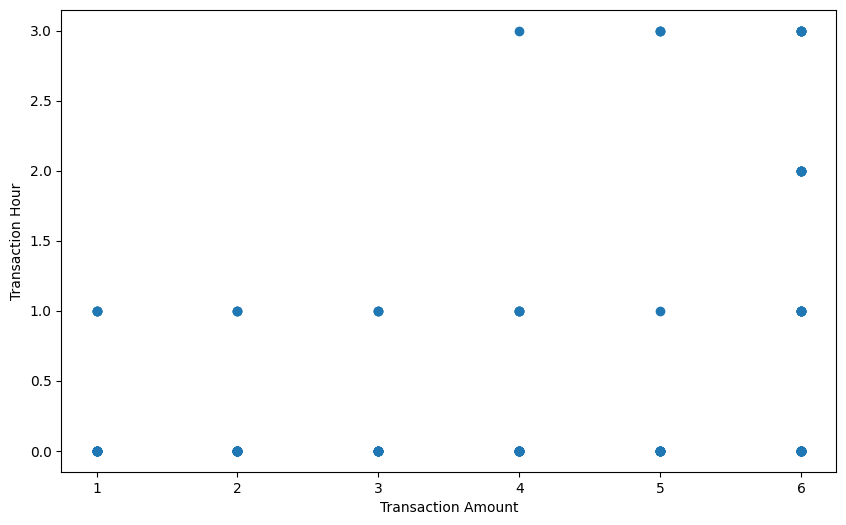

In [344]:
# Visualize the anomaly
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}

ax.scatter(X_train.iloc[np.where(anomaly == 1)]['Transaction Amount'],
           X_train.iloc[np.where(anomaly == 1)]['Transaction Hour'])

plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Hour')
plt.show();

5.2 Clustering Testing Data

In [345]:
# Preprocessing 
def transformTestData(data):

    # 2. Handling Data
    data = transformTransactionAmount(data = data)
    data = transformTransactionHour(data = data)
    data = transformAccountAgeDays(data = data)
    data = transformCustomerAge(data = data)


    return data

In [346]:
data_test_clean = transformTestData(data = X_test)
data_test_clean.head()

,Transaction Amount,Transaction Hour,Account Age Days,Quantity,Customer Age
13501,2,3,2,5,5
13690,2,1,2,1,4
14096,1,1,2,1,2
5706,2,3,2,4,4
8688,2,0,2,2,5


In [347]:
# Predict Test Data
best_cluster_test = kmeans_obj_best.predict(data_test_clean)
best_cluster_test


array([0, 1, 1, ..., 1, 1, 4])

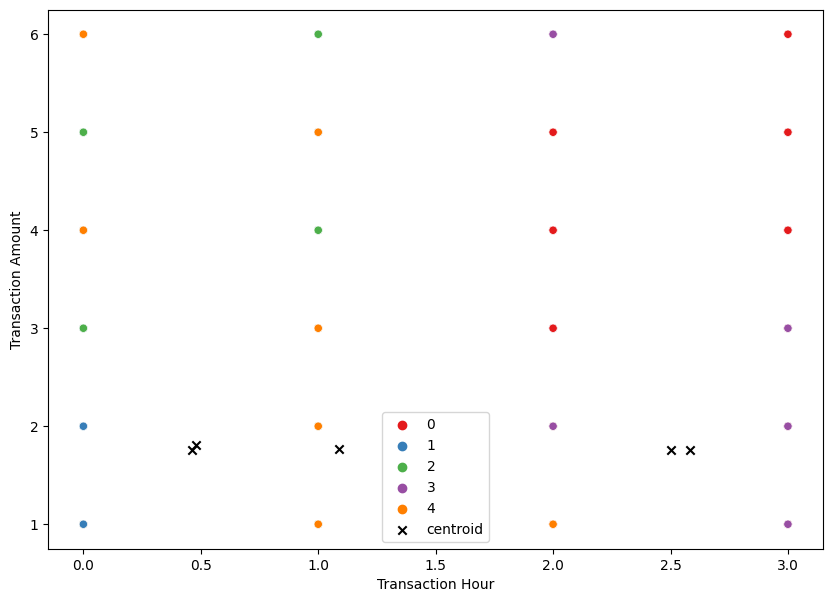

In [348]:
# Visualize
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

sns.scatterplot(data = data_test_clean,
                x = "Transaction Hour",
                y = "Transaction Amount",
                hue = best_cluster_test,
                palette = "Set1",
                ax = ax)

ax.scatter(centroids_best["Transaction Hour"],
           centroids_best["Transaction Amount"],
           marker="x", c="k", label="centroid")

plt.legend()
plt.show()

In [349]:
pd.Series(best_cluster_test).value_counts()

0    2257
2    1937
1    1925
3    1883
4    1452
Name: count, dtype: int64

In [350]:
# Get the distance between each point and its nearest centroid.
distance = getDistanceByPoint(data_test_clean,
                              kmeans_obj)

number_of_outliers = int(outliers_fraction * len(distance))

threshold = distance.nlargest(number_of_outliers).min()

# `anomaly` contain the anomaly result of the above method Cluster (0 : normal, 1 : anomaly)
anomaly = np.array((distance >= threshold).astype(int))

Get anomaly data statistic description

In [351]:
data_test_clean.iloc[np.where(anomaly == 1)].describe()

,Transaction Amount,Transaction Hour,Account Age Days,Quantity,Customer Age
count,94.000000,94.000000,94.000000,94.000000,94.000000
mean,3.414894,1.053191,1.042553,2.414894,2.702128
std,1.931124,1.346976,0.902981,1.756154,1.824739
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,3.000000
75%,6.000000,3.000000,2.000000,5.000000,5.000000
max,6.000000,3.000000,3.000000,5.000000,5.000000


In [352]:
data_test_clean.describe()

,Transaction Amount,Transaction Hour,Account Age Days,Quantity,Customer Age
count,9454.000000,9454.000000,9454.000000,9454.000000,9454.000000
mean,1.763592,1.470171,1.410831,2.992702,3.004654
std,0.702313,1.122229,0.683202,1.418788,1.023463
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,2.000000
50%,2.000000,1.000000,1.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,4.000000
max,6.000000,3.000000,3.000000,5.000000,5.000000


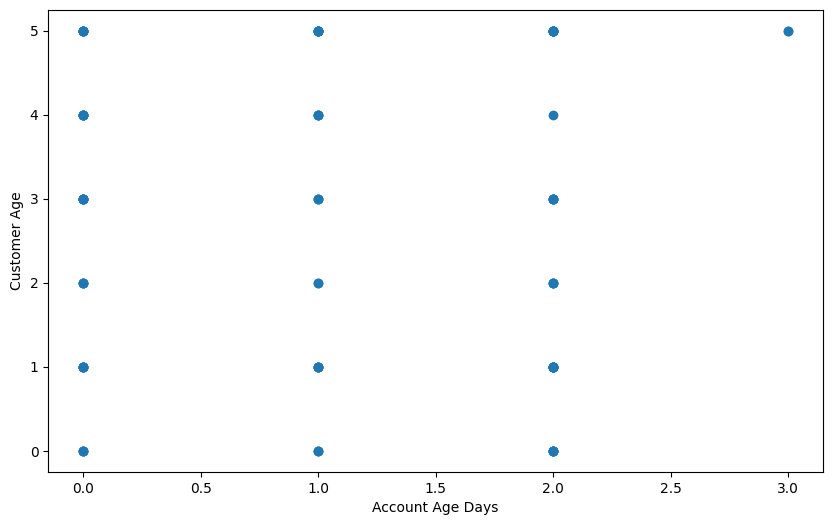

In [353]:
# Visualize the anomaly
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}

ax.scatter(data_test_clean.iloc[np.where(anomaly == 1)]['Account Age Days'],
           data_test_clean.iloc[np.where(anomaly == 1)]['Customer Age'])

plt.xlabel('Account Age Days')
plt.ylabel('Customer Age')
plt.show();